# **W2-Lab1.Questions-DataUnderstanding.ipynb**
# **Group 1**
# **Names:** Mariah Noelle Cornelio, Diego Maldonado, Faizah Khan, Akari Kojima, Alain Siddiqui

In [2]:
# Importing our packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Print the first 5 rows to see what we are dealing with at first

data = pd.read_csv('house_prices.csv')
data.head(5)

,ID,Size(sqft),Bedrooms,Badhrooms,Location,House_Type,Year_Built,Date_Sold,Price
0,1,837.0,1.0,NaN,Rural,NaN,1938.0,7/21/20 00:00,221958.0
1,2,1378.0,1.0,1.0,NaN,Townhouse,200800.0,2/2/22 00:00,771155.0
2,3,157600.0,4.0,1.0,Rural,Semi-Detached,1952.0,6/6/23 00:00,231932.0
3,4,-4493.0,NaN,1.0,Urban,Townhouse,1941.0,6/4/23 00:00,465838.0
4,5,879.0,6.0,3.0,Suburban,Townhouse,NaN,NaN,359178.0


In [4]:
data.shape

# This means that there are 110 rows and 9 columns

(110, 9)

# Question 1: Data Understanding

### Task:
Print the data types of each column and use descriptive statistics to understand the data.

In [ ]:
data.info()

# Using the info command, we can see what type of data goes into each column.

#There are 110 entries and 9 columns.

#ID - Integer. 110 non-null entries. Identifier for each row.
#Size(sqft) - Float. 98 non-null entries. There are 12 missing values.
#Bedrooms - Float. 102 non-null entries. 8 missing values.
#Bathrooms- Float. 90 non-null entries. 20 missing values. Originally spelled "Badhrooms".
#Location- Object(String). 100 non-null entries. 10 missing values.
#House_Type- Object(String). 95 non-null entries. 15 missing values.
#Year_Built- Float. 99 non-null entries. 111 missing values.
#Date_Sold- Object(String). 100 non-null entries. 10 missing values.
#Price- FLoat. 105 non-null entries. 5 missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          110 non-null    int64  
 1   Size(sqft)  98 non-null     float64
 2   Bedrooms    102 non-null    float64
 3   Badhrooms   90 non-null     float64
 4   Location    100 non-null    object 
 5   House_Type  95 non-null     object 
 6   Year_Built  99 non-null     float64
 7   Date_Sold   100 non-null    object 
 8   Price       105 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 7.9+ KB


# Question 2: Identifying and Handling Missing Values

### Task:
Identify missing values in the dataset and propose methods to handle them.

In [ ]:
data.isnull().sum()

# Size (sqft): We have missing values, negative values, and outliers. First, change all numbers to postiives. Fill in missing values with mean/median. As for this column, we would like to keep the outliers because from the look of this column, it seems to generally have a Normal distribution so any outliers will fall on the tails.

# Bedrooms: We have missing values, outliers, and negative values. Fill in missing values and outliers with mean. And change the numbers to positives.

# Bathrooms: The title has a typo so change it to "Bathrooms." Do the same thing we did for bedrooms.

# Location: Fill in the missing values with the mode.

# House_Type: Fill in the missing values with the mode. And also change and imputate the numerical values with the mode.

# Year_Built: Change negatives to positive. For the large numbers, just remove the extra 0's. And then fill in missing values with the mode or the year in which the most houses were frequently built in.

# Date_Sold: Remove the 00:00 and then just remove the missing values and the row it is in because we can't really know unless we call the people who made the dataset.

# Price_Sold: Change negatives to positives. Fill in missing values with the mean. As for outliers, imputate it to the mean/median.


,0
ID,0
Size(sqft),12
Bedrooms,8
Badhrooms,20
Location,10
House_Type,15
Year_Built,11
Date_Sold,10
Price,5


# Question 3: Detecting and Correcting Invalid Entries

### Task:
Identify and correct invalid entries in the dataset.

Change the Badhrooms column title to Bathrooms. Change all column types to appropriate types (like if it should be an integer and not a float, change the float to an integer). Then Change all the negative numbers to positive. In Year_Built column, remove the 2 extra 0's on the large numbers. As for outliers in any column, just replace them with the mean

In [ ]:
data.rename(columns={'Badhrooms': 'Bathrooms'}, inplace=True)
data.head()

,ID,Size(sqft),Bedrooms,Bathroom,Location,House_Type,Year_Built,Date_Sold,Price
0,1,837.0,1,NaN,Rural,NaN,1938.0,7/21/20 00:00,221958.0
1,2,1378.0,1,1.0,NaN,Townhouse,200800.0,2/2/22 00:00,771155.0
2,3,157600.0,4,1.0,Rural,Semi-Detached,1952.0,6/6/23 00:00,231932.0
3,4,4493.0,0,1.0,Urban,Townhouse,1941.0,6/4/23 00:00,465838.0
4,5,879.0,6,3.0,Suburban,Townhouse,NaN,NaN,359178.0


In [6]:
invalid_entries = data[data.select_dtypes(include=['number']) < 0].count()
print("Invalid Entries:\n", invalid_entries)

# This shows how many invalid entries are in each column

Invalid Entries:
 ID            0
Size(sqft)    4
Bedrooms      5
Badhrooms     6
Location      0
House_Type    0
Year_Built    6
Date_Sold     0
Price         6
dtype: int64


In [8]:
numerical_columns = ["Size(sqft)", "Bedrooms","Badhrooms","Year_Built", "Price"] # Have to use the incorrect spelling
categorical_columns = ["Location", "House_Type", "Date_Sold"]

for column in numerical_columns:
    data[column] = data[column].abs() # changed any negatives to absolute values
    data[column].fillna(data[column].mean(), inplace=True)

for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

<ipython-input-8-91af6c5fbb70>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
<ipython-input-8-91af6c5fbb70>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [14]:
negative_entries = data[data["Size(sqft)"] < 0].count() # this would usually have numbers but since the previous
print("Negative Entries:\n", negative_entries)


# This shows how many negative entries are in each column

Negative Entries:
 ID            0
Size(sqft)    0
Bedrooms      0
Bathrooms     0
Location      0
House_Type    0
Year_Built    0
Date_Sold     0
Price         0
dtype: int64


# Question 4: Addressing Duplicate Records

### Task:
Identify and remove duplicate records from the dataset.

In [ ]:
duplicates = data.duplicated().sum()
print("Number of Duplicates:", duplicates)

Number of Duplicates: 0


# Question 5: Data Range Issues

### Task:
Identify and address any data range issues.

In [9]:
pos_val = data[['Size(sqft)', 'Badhrooms', 'Bedrooms', 'Price', 'Year_Built']].abs()
print(pos_val)

        Size(sqft)  Badhrooms   Bedrooms     Price  Year_Built
0       837.000000  12.966667   1.000000  221958.0      1938.0
1      1378.000000   1.000000   1.000000  771155.0    200800.0
2    157600.000000   1.000000   4.000000  231932.0      1952.0
3      4493.000000   1.000000  14.970588  465838.0      1941.0
4       879.000000   3.000000   6.000000  359178.0     11791.0
..             ...        ...        ...       ...         ...
105    1984.000000   2.000000   1.000000  600186.0      1904.0
106   18236.193878   2.000000   1.000000  970910.0     11791.0
107    3945.000000  12.966667   3.000000  748531.0    195700.0
108    3068.000000  12.966667   3.000000  237337.0      1904.0
109    3190.000000   3.000000   6.000000  203355.0      1912.0

[110 rows x 5 columns]


In [10]:
data.describe()

,ID,Size(sqft),Bedrooms,Badhrooms,Year_Built,Price
count,110.000000,110.000000,110.000000,110.000000,110.000000,1.100000e+02
mean,55.500000,18236.193878,14.970588,12.966667,11791.000000,3.175357e+06
std,31.898276,68281.874466,63.429142,45.458409,40646.030025,1.177864e+07
min,1.000000,564.000000,1.000000,1.000000,1900.000000,1.410900e+05
25%,28.250000,1984.000000,2.000000,2.000000,1932.750000,3.263228e+05
50%,55.500000,3191.500000,3.500000,2.000000,1961.500000,5.304415e+05
75%,82.750000,4183.250000,6.000000,3.000000,2007.000000,7.769210e+05
max,110.000000,497400.000000,500.000000,300.000000,200800.000000,7.481430e+07


Range issues we found in the data include values outside of expected range
such as the year being 200800 instead of 2008 (greater value than expected).
Another example is negative values in out of range context such as negative square footage, bedrooms, bathrooms, pricing, and years built. There were also some sum values such as 4.5E+7 in the database which were unexpected.

The approach we decided on using in the out of range issues were to mainly convert the values into a positive integer/float, as the numbers itself made sense but not the negative values at the end. This can be done through an absolute value approach (for the positives)

For instances such as the year_built being "200800 vs. 2008", we think it would be the best and simplest approach to manually delete the extra entries of 00 of each year since there are very few values with that specific error type.

# Question 6: Format Inconsistencies

### Task:
Identify and correct any format inconsistencies in the dataset.

In [12]:
# Column Name Typo

data.rename(columns={'Badhrooms': 'Bathrooms'}, inplace=True)
data.head()


,ID,Size(sqft),Bedrooms,Bathrooms,Location,House_Type,Year_Built,Date_Sold,Price
0,1,837.0,1.000000,12.966667,Rural,Apartment,1938.0,7/21/20 00:00,221958.0
1,2,1378.0,1.000000,1.000000,Urban,Townhouse,200800.0,2/2/22 00:00,771155.0
2,3,157600.0,4.000000,1.000000,Rural,Semi-Detached,1952.0,6/6/23 00:00,231932.0
3,4,4493.0,14.970588,1.000000,Urban,Townhouse,1941.0,6/4/23 00:00,465838.0
4,5,879.0,6.000000,3.000000,Suburban,Townhouse,11791.0,1/1/22 00:00,359178.0


In [13]:
# Removing the 00:00 after Date Sold
data['Date_Sold'] = data['Date_Sold'].str.replace(' 00:00', '')
data.head()

,ID,Size(sqft),Bedrooms,Bathrooms,Location,House_Type,Year_Built,Date_Sold,Price
0,1,837.0,1.000000,12.966667,Rural,Apartment,1938.0,7/21/20,221958.0
1,2,1378.0,1.000000,1.000000,Urban,Townhouse,200800.0,2/2/22,771155.0
2,3,157600.0,4.000000,1.000000,Rural,Semi-Detached,1952.0,6/6/23,231932.0
3,4,4493.0,14.970588,1.000000,Urban,Townhouse,1941.0,6/4/23,465838.0
4,5,879.0,6.000000,3.000000,Suburban,Townhouse,11791.0,1/1/22,359178.0


# Question 7: Misclassified Data

### Task:
Detect and correct any misclassified data within the dataset.

In [18]:
numerical_columns = ["Size(sqft)", "Bedrooms","Bathrooms","Year_Built", "Price"]
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce') # so the data is numbers NOT STRINGS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          110 non-null    int64  
 1   Size(sqft)  110 non-null    float64
 2   Bedrooms    110 non-null    float64
 3   Bathrooms   110 non-null    float64
 4   Location    110 non-null    object 
 5   House_Type  110 non-null    object 
 6   Year_Built  110 non-null    float64
 7   Date_Sold   110 non-null    object 
 8   Price       110 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 7.9+ KB


In [21]:
data[numerical_columns]

,Size(sqft),Bedrooms,Bathrooms,Year_Built,Price
0,837.000000,1.000000,12.966667,1938.0,221958.0
1,1378.000000,1.000000,1.000000,200800.0,771155.0
2,157600.000000,4.000000,1.000000,1952.0,231932.0
3,4493.000000,14.970588,1.000000,1941.0,465838.0
4,879.000000,6.000000,3.000000,11791.0,359178.0
...,...,...,...,...,...
105,1984.000000,1.000000,2.000000,1904.0,600186.0
106,18236.193878,1.000000,2.000000,11791.0,970910.0
107,3945.000000,3.000000,12.966667,195700.0,748531.0
108,3068.000000,3.000000,12.966667,1904.0,237337.0


In [19]:
categorical_colounms = ["Location", "House_Type", "Date_Sold"]
data[categorical_colounms] = data[categorical_colounms].astype(str) # so the data is strings NOT NUMBER
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          110 non-null    int64  
 1   Size(sqft)  110 non-null    float64
 2   Bedrooms    110 non-null    float64
 3   Bathrooms   110 non-null    float64
 4   Location    110 non-null    object 
 5   House_Type  110 non-null    object 
 6   Year_Built  110 non-null    float64
 7   Date_Sold   110 non-null    object 
 8   Price       110 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 7.9+ KB


In [20]:
data[categorical_colounms]

,Location,House_Type,Date_Sold
0,Rural,Apartment,7/21/20
1,Urban,Townhouse,2/2/22
2,Rural,Semi-Detached,6/6/23
3,Urban,Townhouse,6/4/23
4,Suburban,Townhouse,1/1/22
...,...,...,...
105,Urban,Apartment,1/1/22
106,Rural,Townhouse,2/10/20
107,Urban,Townhouse,6/25/20
108,Rural,Apartment,12/9/23


In [24]:
data['House_Type'] = data['House_Type'].apply(lambda x: ''.join([char for char in str(x) if not char.isdigit()]))
data['Date_Sold'] = data['Date_Sold'].str.split(' ').str[0]
data.head()

,ID,Size(sqft),Bedrooms,Bathrooms,Location,House_Type,Year_Built,Date_Sold,Price
0,1,837.0,1,12,Rural,Apartment,1938,7/21/20,221958.0
1,2,1378.0,1,1,Urban,Townhouse,200800,2/2/22,771155.0
2,3,157600.0,4,1,Rural,Semi-Detached,1952,6/6/23,231932.0
3,4,4493.0,14,1,Urban,Townhouse,1941,6/4/23,465838.0
4,5,879.0,6,3,Suburban,Townhouse,11791,1/1/22,359178.0


# Question 8: Data Visualization

### Task:
Use visualizations to identify patterns, inconsistencies, or outliers in the dataset.

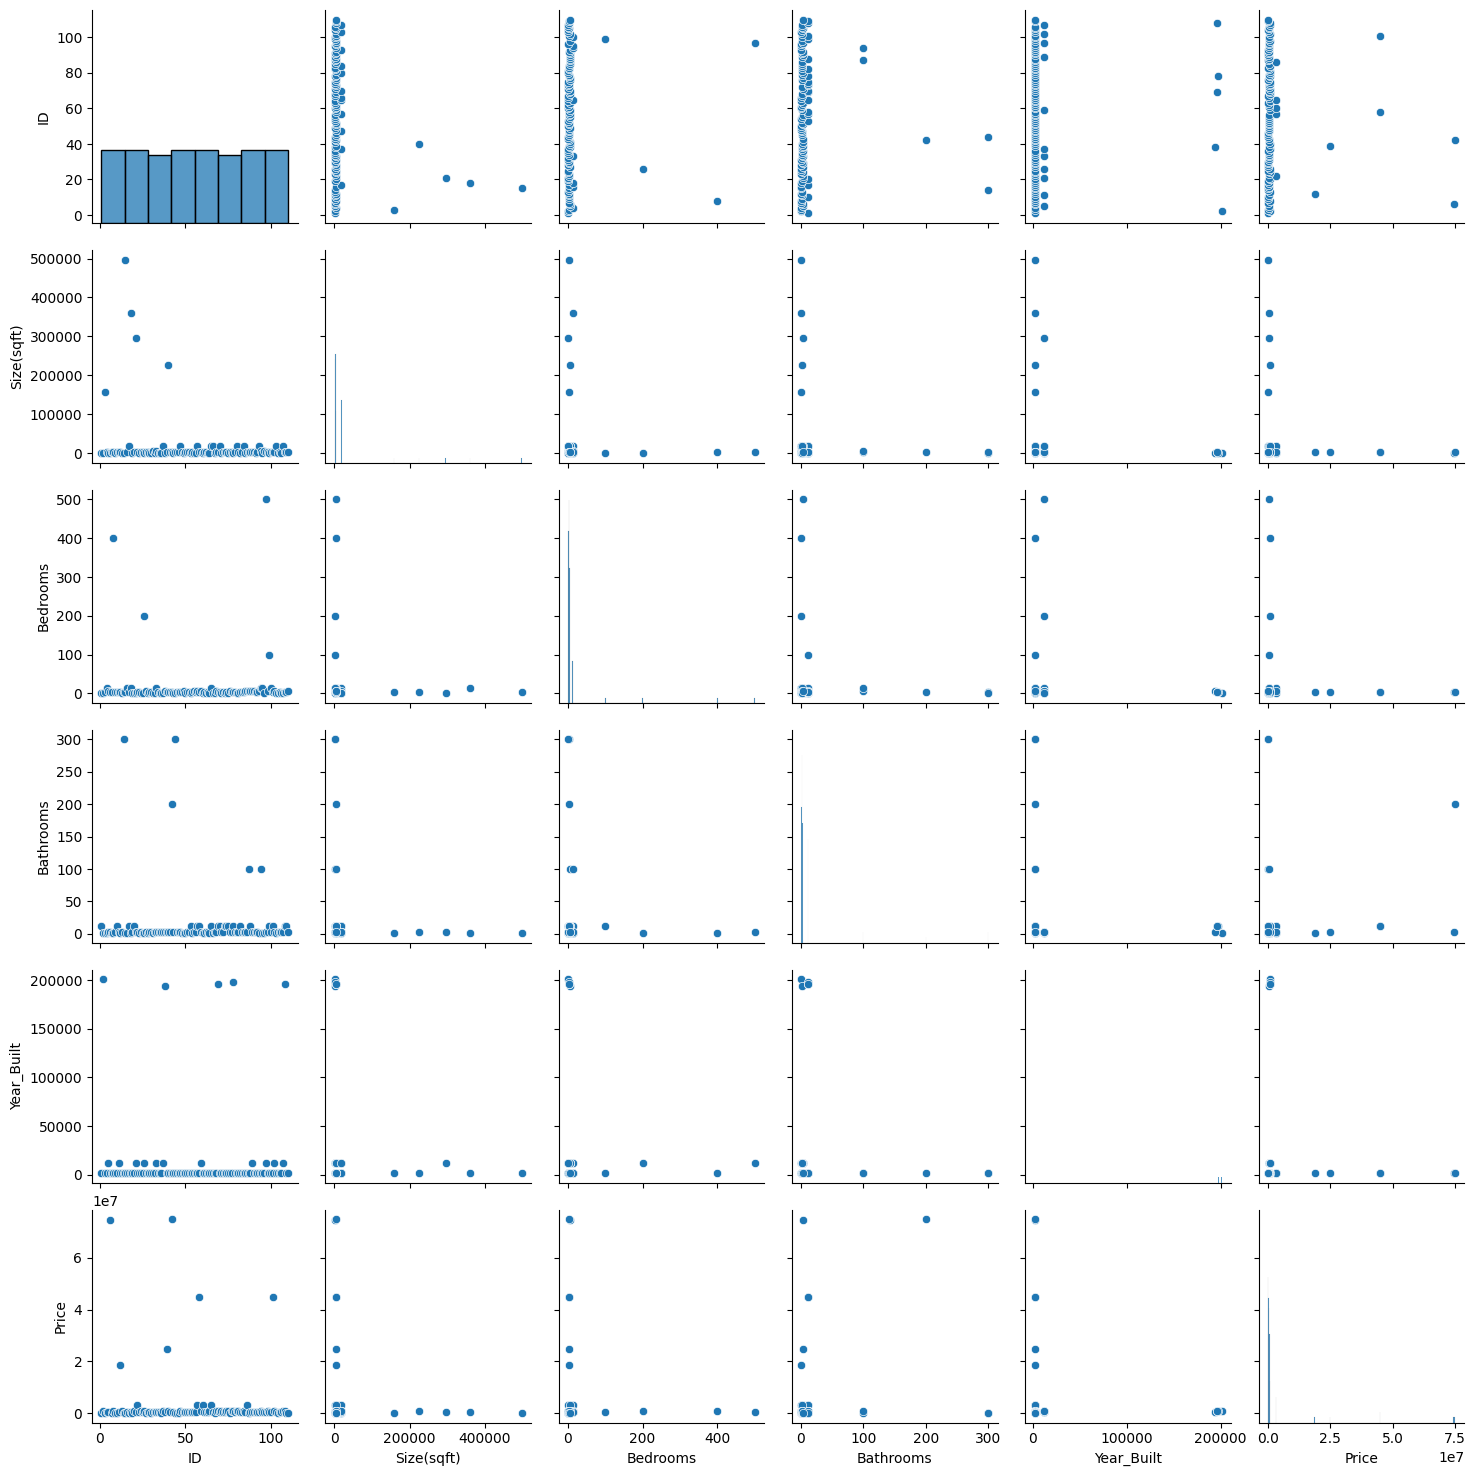

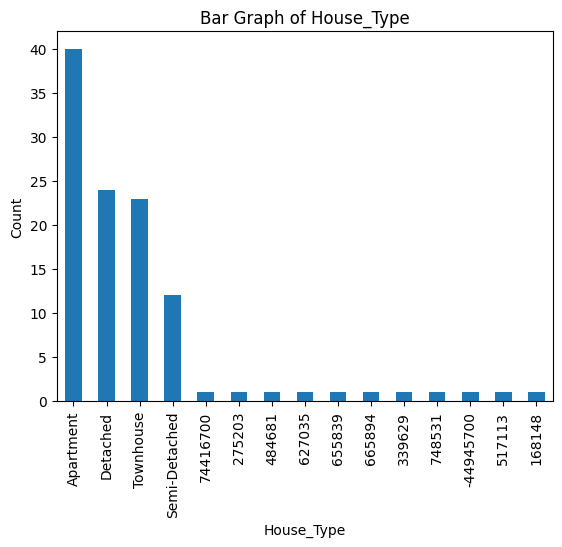

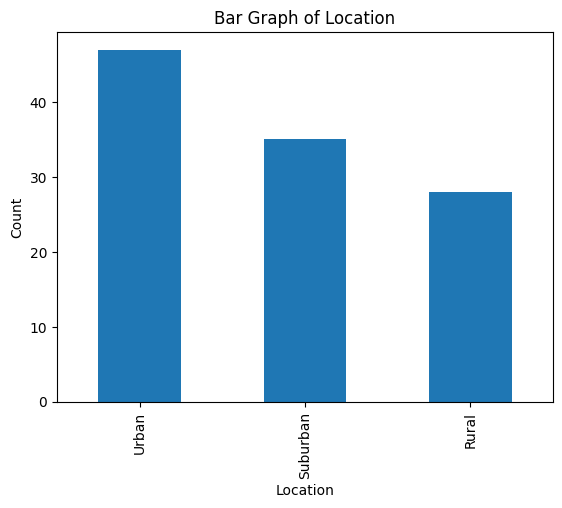

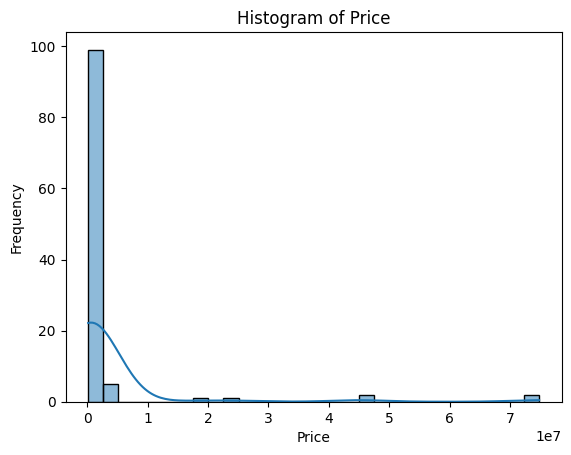

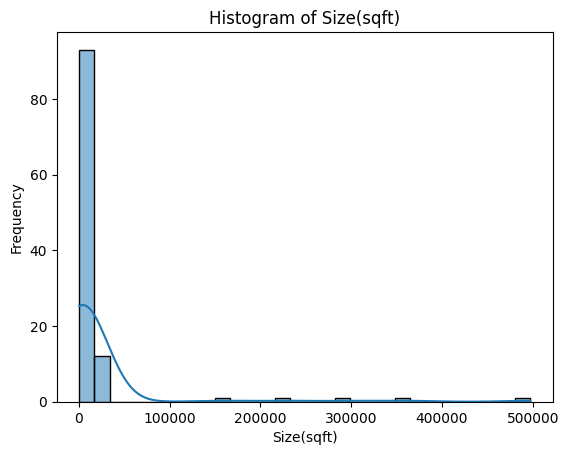

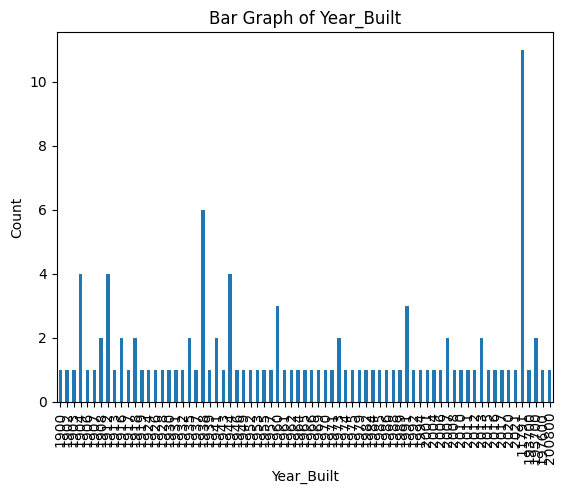

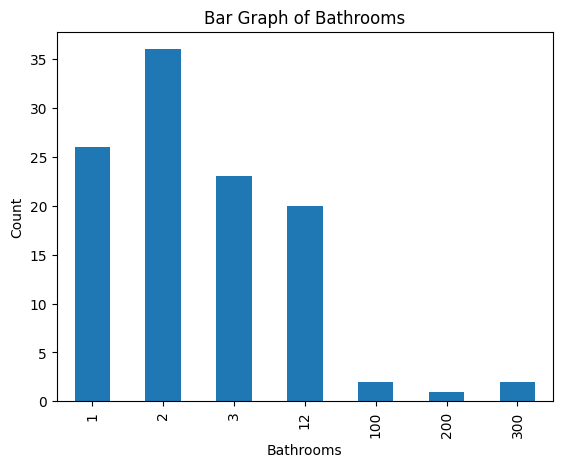

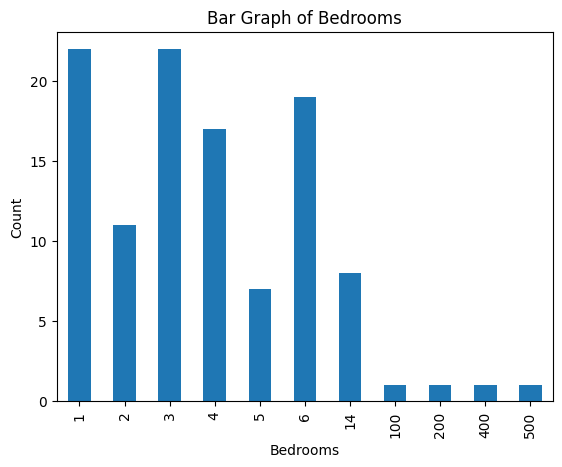

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure correct data types
data['Year_Built'] = data['Year_Built'].astype(int)
data['Bedrooms'] = data['Bedrooms'].astype(int)
data['Bathrooms'] = data['Bathrooms'].astype(int)
data['Price'] = data['Price'].astype(float)
data['Size(sqft)'] = data['Size(sqft)'].astype(float)

# Pairplot for the whole dataset
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
plt.show()

# Bar graph for categorical columns
categorical_columns = ['House_Type', 'Location']
for col in categorical_columns:
    data[col].value_counts().plot(kind='bar', title=f'Bar Graph of {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.show()

# Histogram for numerical columns
numerical_columns = ['Price', 'Size(sqft)']
for col in numerical_columns:
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Count bar graphs for specific columns
count_columns = ['Year_Built', 'Bathrooms', 'Bedrooms']
for col in count_columns:
    data[col].value_counts().sort_index().plot(kind='bar', title=f'Bar Graph of {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.show()

















# 9. Handling Outliers

Outliers:                                                                                               
Task: Detect and manage outliers in the dataset.
Questions:
What methods did you use to identify outliers?
How did you decide to handle these outliers (e.g., removal, adjustment)? Justify your approach.

**To find the outliers in the dataset, we used the IQR method. We do that by finding the statistics for each column if it is an integer/float. And then We do IQR=Q3-Q1. Multiply IQR*1.5=x and then found maximum=Q3+x and minimum=Q1-x. Then if the value is outside the range, we just change it into the mean. We decided the mean value because we believe that the numbers in the column have a Normal distribution (or it can be the mean for skewed distribution, it just depends what we get for #8 data viz part).**

In [25]:
import pandas as pd
import numpy as np

def handle_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean_value = df[column].mean()
        df[column] = df[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
    return df

columns_to_check = ['Size(sqft)', 'Price']

cleaned_data = handle_outliers_iqr(data, columns_to_check)

print(cleaned_data)

      ID    Size(sqft)  Bedrooms  Bathrooms  Location     House_Type  \
0      1    837.000000         1         12     Rural      Apartment   
1      2   1378.000000         1          1     Urban      Townhouse   
2      3  18236.193878         4          1     Rural  Semi-Detached   
3      4   4493.000000        14          1     Urban      Townhouse   
4      5    879.000000         6          3  Suburban      Townhouse   
..   ...           ...       ...        ...       ...            ...   
105  106   1984.000000         1          2     Urban      Apartment   
106  107  18236.193878         1          2     Rural      Townhouse   
107  108   3945.000000         3         12     Urban      Townhouse   
108  109   3068.000000         3         12     Rural      Apartment   
109  110   3190.000000         6          3     Rural       Detached   

     Year_Built Date_Sold     Price  
0          1938   7/21/20  221958.0  
1        200800    2/2/22  771155.0  
2          1952    6/

# 10. Group Discussion Reflection on Data Understanding :                                                     
During the group discussion, what did your team identify as the most significant challenge in the basic data understanding, and how did you approach resolving it? What ideas or steps did you think of or try to tackle it?

During the group discussion, what steps did your team think about or discuss when approaching the tasks outlined in the data understanding group discussion?

**The most challenging thing we found in the dataset was handling the null values: how are we going to fill it in? Should we change it to something else or remove it completely? We took our knowledge from class and decided to fill in the columns with missing categories with the mode and then the columns with missing integers with the mean or median, depending on the distribution of the column values. We also used common sense, as in, fixing the typos and formatting issues.
We had to think about a lot of things. Which methods we would use to detect outliers (Ultimately, we decided on the IQR method although we know that there is also the Z-score method), what types of data viz graphs to use (histograms to represent the numerical values and bar plots to represent the categorical values). To visualize everything, we also thought of using a pair plot. We also had to change the column types to their appropriate types (making sure integers were not strings and vice versa) which proved to be challenging. Because without initial data cleaning, we could not really start anything.**



---



---



# Different Approach to this lab

A different approach would be to tackle each column separately and see how we could clean each column's null values, negatives, etc.

In [ ]:
#Size (sqft):
# Fix negative values by converting them to positive
data['Size(sqft)'] = data['Size(sqft)'].abs()

# Fill empty spaces with the mean of the column
data['Size(sqft)'] = pd.to_numeric(data['Size(sqft)'], errors='coerce')
mean_size = data['Size(sqft)'].mean()
data['Size(sqft)'] = data['Size(sqft)'].fillna(mean_size)

# Apply the IQR method to detect and replace outliers with the mean
Q1 = data['Size(sqft)'].quantile(0.25)
Q3 = data['Size(sqft)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mean_size = data['Size(sqft)'].mean()
data['Size(sqft)'] = data['Size(sqft)'].apply(lambda x: mean_size if x < lower_bound or x > upper_bound else x)

# Convert the column to integer
data['Size(sqft)'] = data['Size(sqft)'].astype(int)

# Display the first few rows to verify
data[['Size(sqft)']].head(10)

#Bedrooms:
# Fill empty spaces with the mode of the column
mode_bedrooms = data['Bedrooms'].mode()[0]
data['Bedrooms'] = pd.to_numeric(data['Bedrooms'], errors='coerce')
data['Bedrooms'] = data['Bedrooms'].fillna(mode_bedrooms)

# Replace values above 6 with the mode
data['Bedrooms'] = data['Bedrooms'].apply(lambda x: mode_bedrooms if x > 6 else x)

# Convert negative values to positive
data['Bedrooms'] = data['Bedrooms'].abs()

# Convert the column to integer
data['Bedrooms'] = data['Bedrooms'].astype(int)

# Display the updated column
data[['Bedrooms']].head(10)

#Bathrooms:
# Rename the column to Bathrooms
data.rename(columns={'Badhrooms': 'Bathrooms'}, inplace=True)

# Fill empty spaces with the mode of the column
mode_bathrooms = data['Bathrooms'].mode()[0]
data['Bathrooms'] = pd.to_numeric(data['Bathrooms'], errors='coerce')
data['Bathrooms'] = data['Bathrooms'].fillna(mode_bathrooms)

# Replace values above 3 with the mode
data['Bathrooms'] = data['Bathrooms'].apply(lambda x: mode_bathrooms if x > 3 else x)

# Convert negative values to positive
data['Bathrooms'] = data['Bathrooms'].abs()

# Convert the column to integer
data['Bathrooms'] = data['Bathrooms'].astype(int)

# Display the updated column
data[['Bathrooms']].head(10)

#Location:
# Fill empty spaces with the mode of the column
mode_location = data['Location'].mode()[0]
data['Location'] = data['Location'].fillna(mode_location)

# Ensure the column is of string type
data['Location'] = data['Location'].astype(str)

# Display the updated column
data[['Location']].head(10)

#House_Type:
# Remove numbers and negative values from the 'House_Type' column and replace with mode
data['House_Type'] = data['House_Type'].apply(lambda x: ''.join([i for i instr(x) ifnot i.isdigit()]) ifisinstance(x, str) elsestr(x))

# Fill empty values with mode
mode_house_type = data['House_Type'].mode()[0]
data['House_Type'].fillna(mode_house_type, inplace=True)

# Ensure the column is of type string
data['House_Type'] = data['House_Type'].astype(str)

# Display the cleaned-up columnprint(data['House_Type'])

#Year_Built:
data['Year_Built'] = data['Year_Built'].apply(lambda x: str(abs(int(x)))[0:4] ifisinstance(x, (int, float)) elsestr(x))

# Fill empty values with mode
mode_year_built = data['Year_Built'].mode()[0]
data['Year_Built'].fillna(mode_year_built, inplace=True)

# Ensure the column is of type integer
data['Year_Built'] = data['Year_Built'].astype(int)

# Display the cleaned-up 'Year_Built' columnprint(data['Year_Built'])

Date_Sold:
# Remove the '00:00' time portion and reformat Date_Sold
data['Date_Sold'] = data['Date_Sold'].apply(lambda x: str(x).split(' ')[0] if isinstance(x, str) else x)

# Drop rows with missing 'Date_Sold'
data = data.dropna(subset=['Date_Sold'])

# Display the cleaned-up 'Date_Sold' column
print(data['Date_Sold'])

Price:
# Ensure Price is a positive number and fill missing values with the mean
data['Price'] = data['Price'].apply(lambda x: abs(x) if isinstance(x, (int, float)) else x)

# Fill missing values with the mean of the column
mean_price = data['Price'].mean()
data['Price'].fillna(mean_price, inplace=True)

# Change the data type to integer
data['Price'] = data['Price'].astype(int)

# Calculate Q1, Q3, and IQR for outlier detection
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median of the column
median_price = data['Price'].median()
data['Price'] = data['Price'].apply(lambda x: median_price if x < lower_bound or x > upper_bound else x)

# Display the cleaned-up 'Price' column
print(data['Price'])